In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium import webdriver
browser = webdriver.Chrome('./chromedriver.exe')
browser.get('https://www.cupoy.com/newsfeed/topicgrp/tech_tw')
time.sleep(5)

SCROLL_PAUSE_TIME = 3



dic={}
count = 0
Sum = 500

Category= []
Story = []
sort=[]
while count!=500:

    html=browser.page_source  # 打開瀏覽器
    sp=BeautifulSoup(html,'html5lib')
    
    last_height = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #找到目標資訊後以for迴圈將目錄及標題存在一個list
    for sort in sp.find('div', class_ = 'ReactVirtualized__Grid__innerScrollContainer').find_all(class_='sc-eEieub sc-iuDHTM ibJqYc'):
        category=sort.find(class_ = 'sc-gacfCG bPSpUf').text
        story=sort.find(class_ = 'sc-erNlkL sc-ekulBa hDLssh').text
        if count==500:break
        if story not in sort:#判斷是否已經有爬過了，若未爬過就+1並且新增到整理好的list
            count+=1
            Category.append(category)
            Story.append(story)
            print(count,category,story)
    
            
        
    
    # 模擬網頁下拉
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # 等待一段時間讓網頁更新
    time.sleep(SCROLL_PAUSE_TIME)

    # 檢視目前網頁底端
    new_height = browser.execute_script("return document.body.scrollHeight")
    
    last_height = new_height
   

browser.quit()


1 資訊安全 疫情拉鋸！專家：痊癒病人無症狀，核酸卻呈陽性 | TechNews 科技新報
2 資訊安全 【臺灣成功合成 97％ 純度抗疫藥】防疫火力全開！臺生技業組「抗疫國家隊」，與美國衛院合作拚疫苗開發 | BuzzOrange
3 APP應用程式 Snapseed 為相片加入類似 InstaSize 白邊特效，更強大的免費修圖 App
4 Google專區 Google 利用機器學習來打擊煩人的 app 裡廣告
5 AI與大數據 紅帽OS整合雲端分析與自動管理，強化企業工作負載支援 | iThome
6 電子商務 Cloud周報第54期：阿里巴巴公佈最新財報，雲端業務單季收入首度超過100億人民幣 | iThome
7 手機平板 悠遊付 5 大功能搶先看！手機就能「嗶」進站，不用再掏零錢儲值了 | 經理人八分生活 80%LIFE
8 資訊安全 【武漢肺炎】防疫視同作戰！臺灣組「生技國家隊」抗疫 - INSIDE
9 資訊安全 微軟Microsoft Defender擴大到iOS、Android及Linux平臺 | iThome
10 AI與大數據 華爲雲奪得信息檢索權威競賽WSDM Cup 2020金牌，參賽方案全解讀 | 機器之心
11 AI與大數據 聯想中國PC份額創出43.5%歷史新高 ，智慧服務突破15億元增速迅猛 | 機器之心
12 3C產品 以AI馳援，商湯肺部智能分析產品助力多地科技抗“疫” | 機器之心
13 資訊安全 美國防部通訊IT單位去年員工個資疑遭外洩 | iThome
14 資訊安全 Cybermdx：許多醫院沒有針對設備已知重大漏洞進行修補 | iThome
15 AI與大數據 Google地圖應用機器學習技術，自動清除7,500萬筆不良評論 | iThome
16 社交媒體 為何顧客總是不買單？善用「再行銷」抓住潛在客羣，有效提升下單率 | SmartM 新網路科技
17 APP應用程式 微軟的 Defender 防毒軟體將會移植到 iOS 和 Android
18 AI與大數據 《西部世界》第三季新預告片中出現了 AI 對決
19 APP應用程式 Apple 或許會讓使用者更改 iOS 的預設應用程式
20 醫療健康 「我真的沒病！」他們從武漢返國隔離結束仍遭鄰居歧視…專家：這羣人反而最安全-風傳媒
21 AI與大數據 【白牌司

In [4]:
#計算各項分類的文章數目
listcount=[]
listcategory=[]
i=0
for i in range(len(Category)):
    if Category[i] not in listcategory:
        listcategory.append(Category[i])
        listcount.append(Category.count(Category[i]))
print(listcategory,listcount)

['資訊安全', 'APP應用程式', 'Google專區', 'AI與大數據', '電子商務', '手機平板', '3C產品', '社交媒體', '醫療健康', '虛擬實境', '相機', '蘋果專區', '創業', '遊戲情報', 'Fintech金融科技', '區塊鏈技術', '筆電', '美妝保養', '無人駕駛', '財經', '物聯網', '超級瑪利歐', '理財', '美食', '籃球', '職涯', '網紅經濟與自媒體', '趨勢與策略', '汽車', '行銷', '攝影', '旅遊', '育兒'] [24, 51, 15, 146, 13, 30, 23, 15, 2, 9, 5, 21, 7, 25, 30, 28, 4, 4, 3, 3, 3, 1, 3, 4, 3, 11, 2, 8, 1, 2, 2, 1, 1]


In [5]:
#將資料以表格方式列出
import pandas as pd
df=pd.DataFrame(listcategory,listcount,columns=['分類累積數'])
df

,分類累積數
24,資訊安全
51,APP應用程式
15,Google專區
146,AI與大數據
13,電子商務
30,手機平板
23,3C產品
15,社交媒體
2,醫療健康
9,虛擬實境


In [6]:
#以matplotlib來呈現視覺化的資料
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

In [2]:
#由於資料過於零散，所以挑選超過25筆以上的做成圖片
listcount=[]
listcategory=[]
i=0
for i in range(len(Category)):
    if Category[i] not in listcategory:
        listcategory.append(Category[i])
        listcount.append(Category.count(Category[i]))
datacount=[]
datacat=[]     
for i in range(len(listcategory)):
    if listcount[i]>25:
        datacount.append(listcount[i])
        datacat.append(listcategory[i])
print(datacount,datacat)

NameError: name 'Category' is not defined

<BarContainer object of 5 artists>

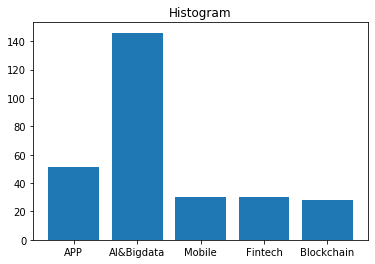

In [32]:
plt.title('Histogram')
x =  ['APP', 'AI&Bigdata', 'Mobile', 'Fintech', 'Blockchain']
y = [51, 146, 30, 30, 28]
plt.bar(x, y)

<function matplotlib.pyplot.show(*args, **kw)>

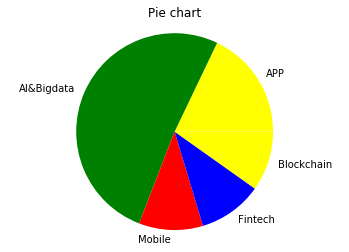

In [33]:
 import matplotlib.pyplot as plt
 labels=['APP', 'AI&Bigdata', 'Mobile', 'Fintech', 'Blockchain']
 plt.title('Pie chart')

 values=[51, 146, 30, 30, 28]
 colors=['yellow','green','red','blue']
 plt.pie(values,labels=labels,colors=colors)
 plt.axis('equal')
 plt.show
